In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pearc19_model import pop_dyn
from scipy.signal import find_peaks

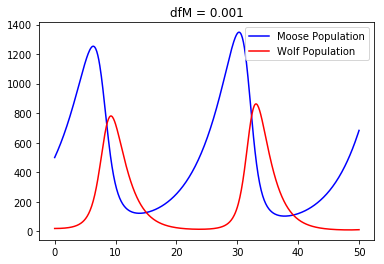

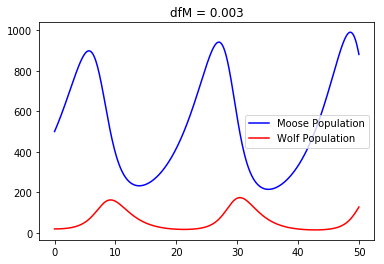

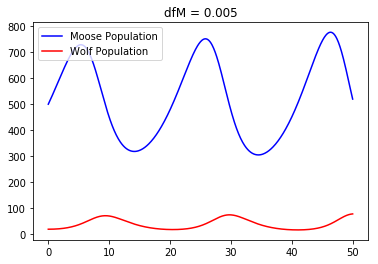

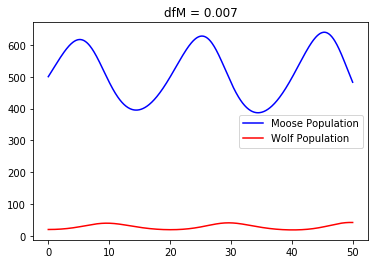

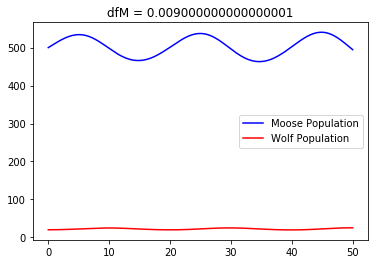

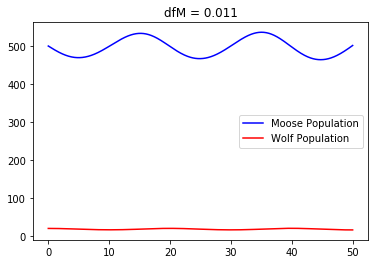

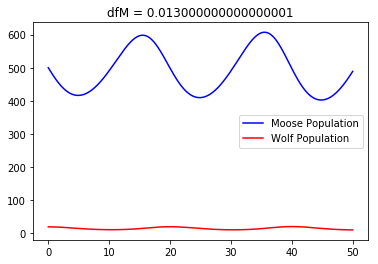

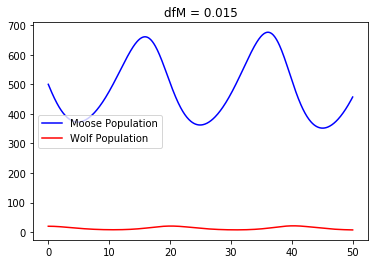

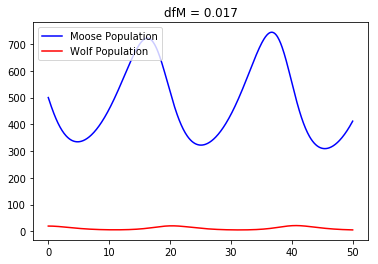

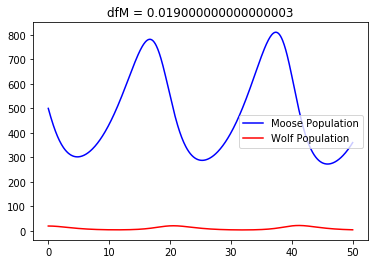

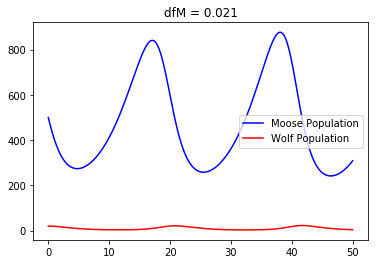

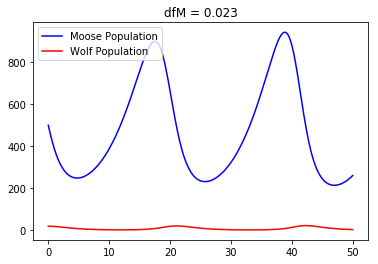

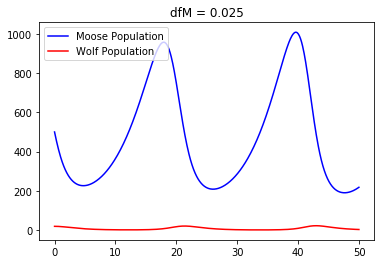

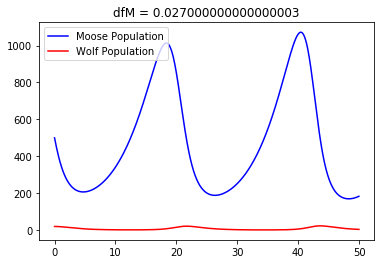

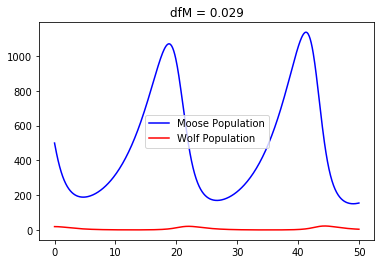

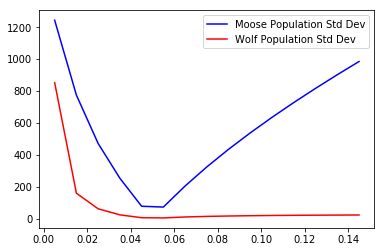

In [2]:
dfM_vec = np.arange(0.001, 0.030, 0.002)
M_amp = np.zeros(dfM_vec.size)
W_amp = np.zeros(dfM_vec.size)
brM = 0.2

for i, dfM_var in enumerate(dfM_vec):
    t,M,W = pop_dyn(dfM = dfM_var)
    
    M_peaks, _ = find_peaks(M) 
    W_peaks, _ = find_peaks(W)
    M_amp[i] = np.amax(M) - np.amin(M)
    W_amp[i] = np.amax(W) - np.amin(W)
    
    plt.figure()
    plt.title('dfM = '+ str(dfM_var))
    # Plot the moose population
    plt.plot(t, M, color = "b", label = "Moose Population")
    plt.plot(t, W, color = "r", label = "Wolf Population")
    
    plt.legend()
    plt.show()
    
plt.figure()
plt.plot(dfM_vec/brM, M_amp, color = "b", label = "Moose Population Std Dev" )
plt.plot(dfM_vec/brM, W_amp, color = "r", label = "Wolf Population Std Dev")
plt.legend()
plt.show()
